In [1]:
import keras
import keras.backend as K
from keras.layers import Conv2D, MaxPooling2D, Flatten ,Dense, Dropout , Embedding
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.callbacks import TensorBoard
from keras.models import Sequential 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix
%matplotlib inline

Using TensorFlow backend.


In [2]:
# NAME = "mnist-{}".format(int(time.time()))
# graph_dir = 'F:\\Python Projects\\GRAPH\\vinayak_mnist_GRAPH\\logs\\{}'.format(NAME)

data = mnist.load_data()

In [3]:
# Getting the descrition of data
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
len(data)

2

In [5]:
# now  the training data  desc
print(data[0])
print(len(data[0]))

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

In [6]:
# Now we can see the 2 array's for training data one is feature and second is label's
x_train = data[0][0]
y_train = data[0][1]

In [7]:
print(x_train)
print(len(x_train))

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
60000


In [8]:
print(y_train)
print(len(y_train))

[5 0 4 ... 5 6 8]
60000


In [9]:
# this is the testing data
x_test = data[1][0]
print(len(x_test))

10000


In [10]:
y_test = data[1][1]
mark = y_test
len(y_test)

10000

In [11]:
# ploting the one of the vlaue
print(len(x_train)); print(len(y_train))
print(len(x_test)); print(len(y_test))

60000
60000
10000
10000


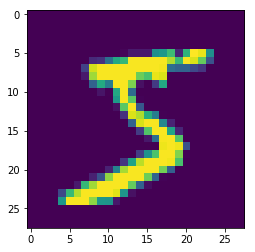

In [12]:
plt.imshow(x_train[0])

In [13]:
x_train[0].shape

(28, 28)

In [14]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

print(x_train.shape)

(60000, 28, 28)


In [15]:
# # now making the model 
# model = Sequential()
# model.add(Embedding(1000, 64, input_length=10))

# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be no larger than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch dimension.

# input_array = np.random.randint(1000, size=(32, 10))

# model.compile('rmsprop', 'mse')
# output_array = model.predict(input_array)
# assert output_array.shape == (32, 10, 64)


# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3) ,activation = 'relu',input_shape=(28,28,1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32,kernel_size=(3, 3) ,activation = 'relu' ))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(10, activation='softmax'))

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [17]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train.shape
print(y_train)

# tensorboard
NAME = "mnist-{}".format(int(time.time()))
graph_dir = 'F:\\Python Projects\\GRAPH\\vinayak_mnist_GRAPH\\{}'.format(NAME)

tensorboard = TensorBoard(log_dir=graph_dir,
                          write_graph=True,
                          histogram_freq=10,
                          write_grads = True,
                          write_images = True)

# tensorboard = TensorBoard(log_dir=graph_dir)

history= model.fit(x_train, y_train,
          batch_size=128,
          epochs=3,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks = [tensorboard])

print(history.history.keys())

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 203s 3ms/step - loss: 0.8998 - acc: 0.8875 - val_loss: 0.0640 - val_acc: 0.9812
Epoch 2/3
60000/60000 [==============================] - 205s 3ms/step - loss: 0.1017 - acc: 0.9711 - val_loss: 0.0441 - val_acc: 0.9854
Epoch 3/3
60000/60000 [==============================] - 196s 3ms/step - loss: 0.0722 - acc: 0.9792 - val_loss: 0.0358 - val_acc: 0.9884
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [18]:
# Savin and loading the model
def saving_model(model_instance,model_name):
    model_instance.save(str(model_name))
    print("Model Saved")
    
def loading_model(model_name):
    model = models.load_model(str(model_name))
    print("Model Loaded")
    return model

saving_model(model,"vinayak_mnist.model")

Model Saved


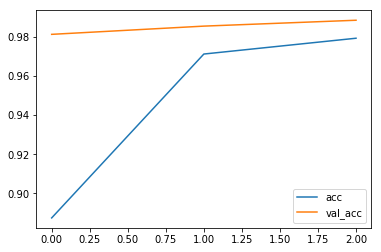

In [19]:
# plt
plt.plot(history.epoch, history.history['acc'] , label="acc")
plt.plot(history.epoch, history.history['val_acc'] , label = "val_acc")
plt.legend()
plt.show()

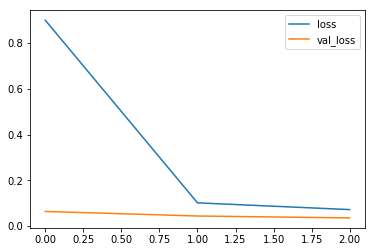

In [20]:
# plt
plt.plot(history.epoch, history.history['loss'] , label = "loss")
plt.plot(history.epoch, history.history['val_loss'] , label = "val_loss")
plt.legend()
plt.show()

In [21]:
z = model.predict_classes(x_test)
print(z)

[7 2 1 ... 4 5 6]


In [22]:
pred = model.predict(x_test)
print(pred)

[[3.3897923e-10 1.0198693e-11 2.6274822e-08 ... 1.0000000e+00
  1.5450088e-12 1.6131529e-09]
 [2.0369154e-07 5.8068667e-07 9.9999917e-01 ... 1.6124286e-09
  5.6822262e-09 4.5604202e-12]
 [8.6250024e-10 9.9999964e-01 7.6223616e-10 ... 2.2134590e-09
  9.7424667e-08 8.5460194e-11]
 ...
 [7.6852533e-14 3.7316905e-09 3.3100675e-14 ... 2.9353515e-09
  1.2495879e-09 2.0482258e-08]
 [5.4036425e-10 7.6785791e-12 4.0861655e-13 ... 3.4533792e-11
  1.3149794e-07 4.9424270e-11]
 [2.8047958e-10 9.3736336e-13 2.7096299e-09 ... 5.1002263e-13
  6.8049313e-09 6.9271325e-11]]


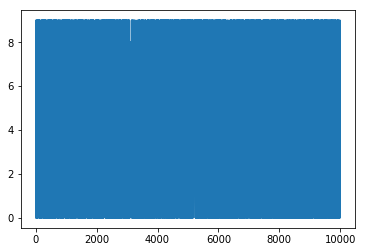

In [23]:
plt.plot(z)

<BarContainer object of 10000 artists>

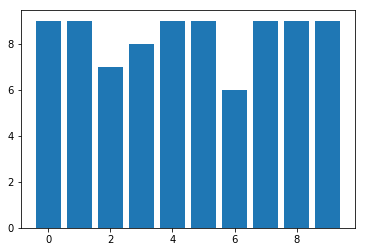

In [24]:
plt.bar(z,mark)

In [25]:
confusion_matrix(z,mark)

array([[ 978,    0,    2,    0,    0,    0,    6,    0,    3,    1],
       [   0, 1129,    4,    0,    0,    0,    3,    0,    1,    1],
       [   0,    0, 1013,    2,    1,    0,    0,    6,    0,    0],
       [   0,    2,    1,  996,    0,    2,    1,    0,    1,    0],
       [   0,    2,    0,    0,  970,    0,    2,    1,    2,    5],
       [   0,    1,    0,    4,    0,  887,    4,    1,    0,    4],
       [   0,    0,    1,    0,    1,    2,  940,    0,    0,    0],
       [   1,    0,    9,    4,    0,    0,    0, 1015,    1,    2],
       [   1,    1,    2,    4,    2,    0,    2,    1,  963,    3],
       [   0,    0,    0,    0,    8,    1,    0,    4,    3,  993]],
      dtype=int64)

Text(33.0, 0.5, "Original value's")

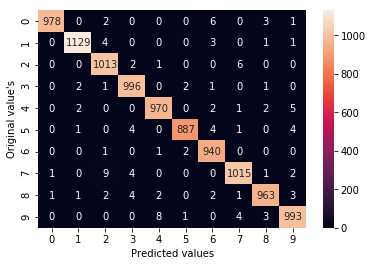

In [26]:
sns.heatmap(confusion_matrix(z,mark),annot=True,fmt='.5g')
plt.xlabel("Predicted values")
plt.ylabel("Original value's")